# Importing the required libraries


In [4]:
# import statements
import os
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder, DatasetFolder
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split, ConcatDataset
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
from torchvision.transforms import ToTensor
from torchvision.transforms import ToPILImage
from IPython.display import Image
import pandas as pd
from tqdm.notebook import tqdm
from yellowbrick.classifier import ClassificationReport
from texttable import Texttable
from pytorch_lightning import Trainer
import warnings  # ignore any warnings
warnings.filterwarnings("ignore")

# Training Dataset Creation

Loading the dataset from the directory

In [5]:
def load_dataset(directory_path):  # load dataset 
    image_transforms = transforms.Compose(
                    [transforms.Resize((32,32)), # resize images
                     transforms.ToTensor(),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalization of images
                    ])
  
    dataset = ImageFolder(    # root path of the data set folder
                        root = directory_path,
                        transform = image_transforms # to transform the images
                        )
    return dataset

directory_path = "./AI_Dataset/data/" # path directory
dataset = load_dataset(directory_path)  # load dataset from the given directory

Dataset classes/labels

In [6]:
classes = dataset.classes  # prints the no. of classes i.e. labels we have in the dataset
classes

['not_a_person', 'with_mask', 'without_mask']

Counting the number of images present in each of the classes

In [4]:
 def data_class_distribution(dataset):  # gives the count of each classes of the dataset i.e. no of images per class
  data_class_count = {}
  for _, index in dataset:
    label = classes[index]
    if label not in data_class_count:
      data_class_count[label] = 0
    data_class_count[label] += 1
  return data_class_count  # returns the count
    
 data_class_count = data_class_distribution(dataset)
 print("The number of images present in each of the three classes:", data_class_count) # print count of classes

The number of images present in each of the three classes: {'not_a_person': 6000, 'with_mask': 6027, 'without_mask': 5978}


# Dataset Visualization

In [7]:
def plot_dataset_images(file_path, images_list):  # method to visualise our dataset, for the passed parameter class
  rows=2    # no. of rows for images to plot
  cols=5    # no. of column for images to plot

  fig,ax = plt.subplots(rows,cols,figsize=(25,25))
  r = 0
  c = 0
  for i in range(rows*cols):
    aa = plt.imread(os.path.join(file_path, images_list[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
      c=0
      r+=1
  plt.show() # plotting of the images

1. Sample images of the class "With a mask"

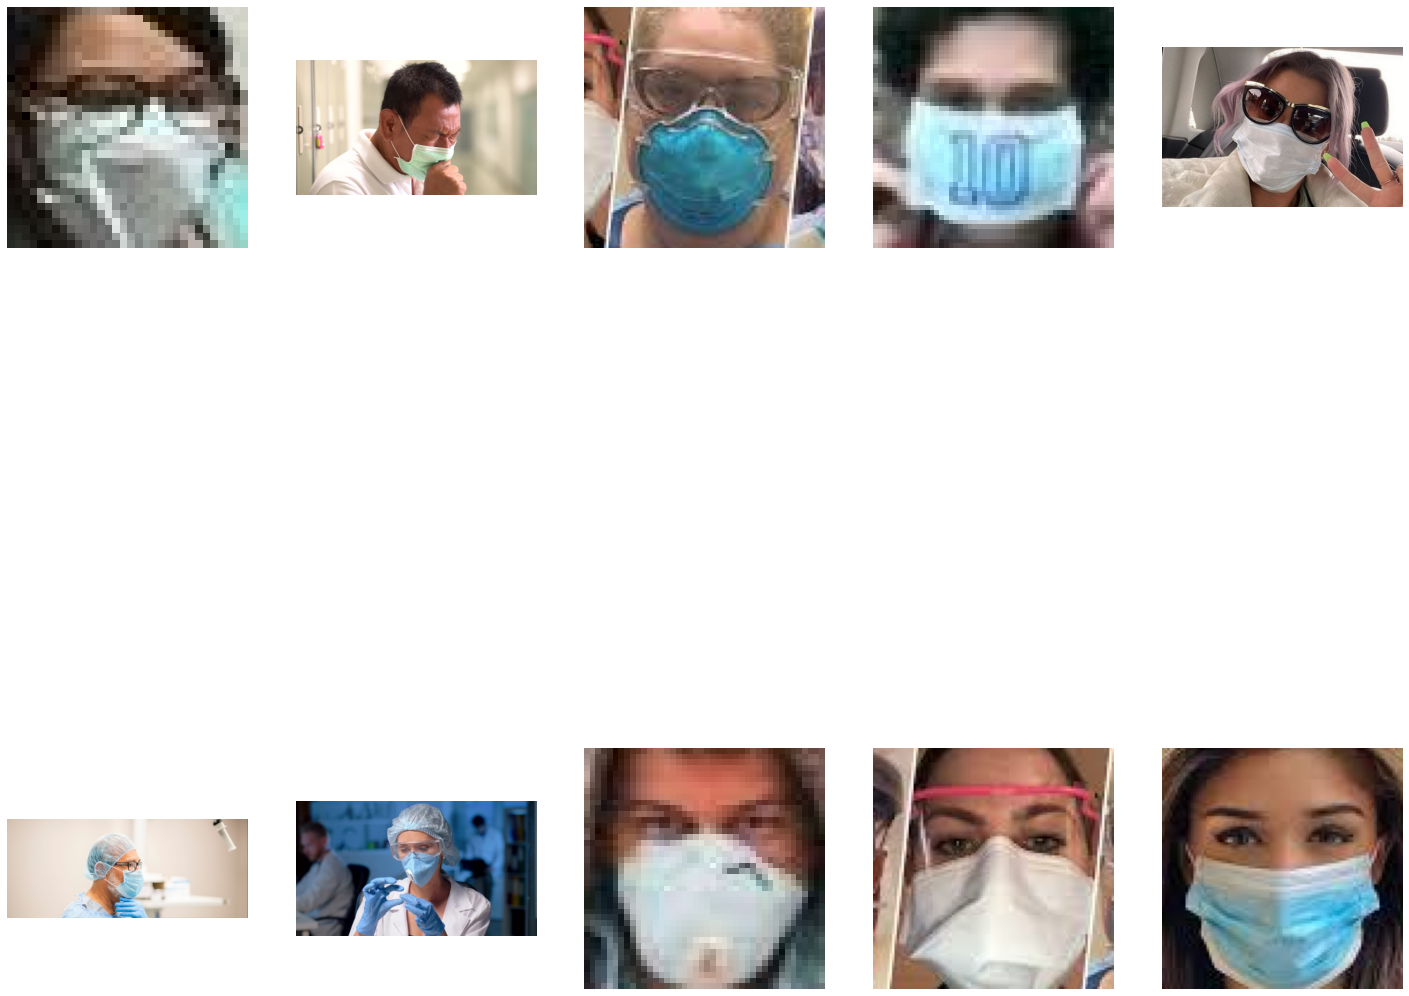

In [8]:
with_mask_file_path = "./AI_Dataset/data/with_mask" # to plot with mask images dataset
with_mask_images = os.listdir("./AI_Dataset/data/with_mask") 

plot_dataset_images(with_mask_file_path, with_mask_images)


2. Sample images of the class "Without a mask"

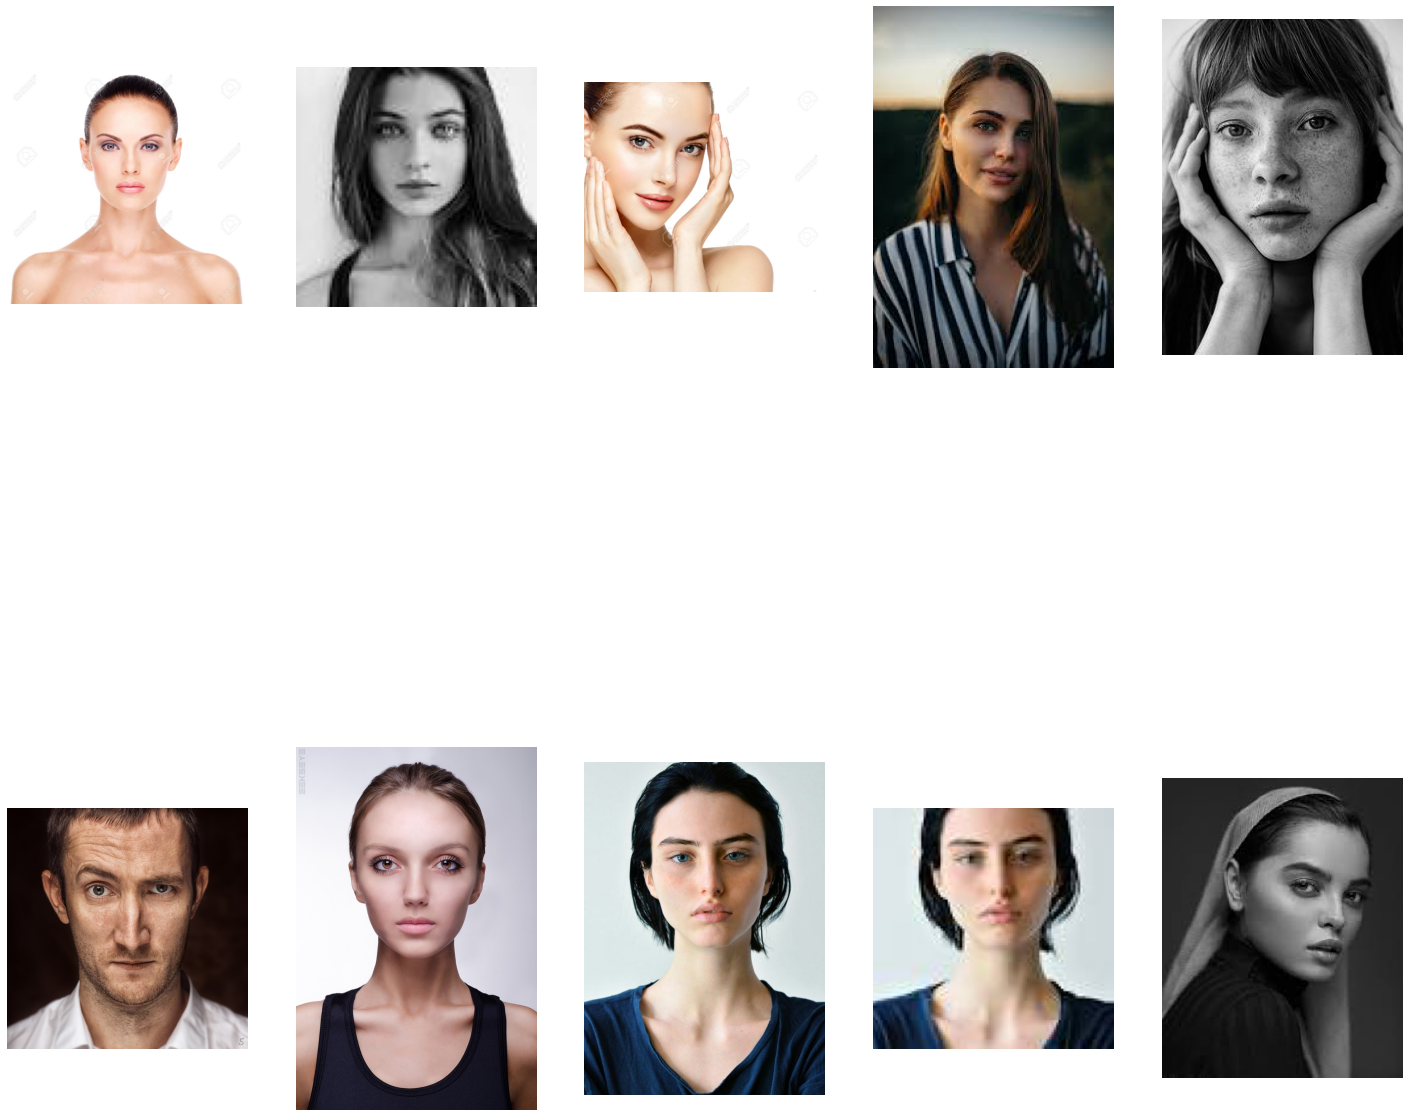

In [9]:
without_mask_file_path = "./AI_Dataset/data/without_mask"  # to plot without mask images dataset
without_mask_images = os.listdir("./AI_Dataset/data/without_mask")

plot_dataset_images(without_mask_file_path, without_mask_images)

3. Sample images of the class "Not a person"

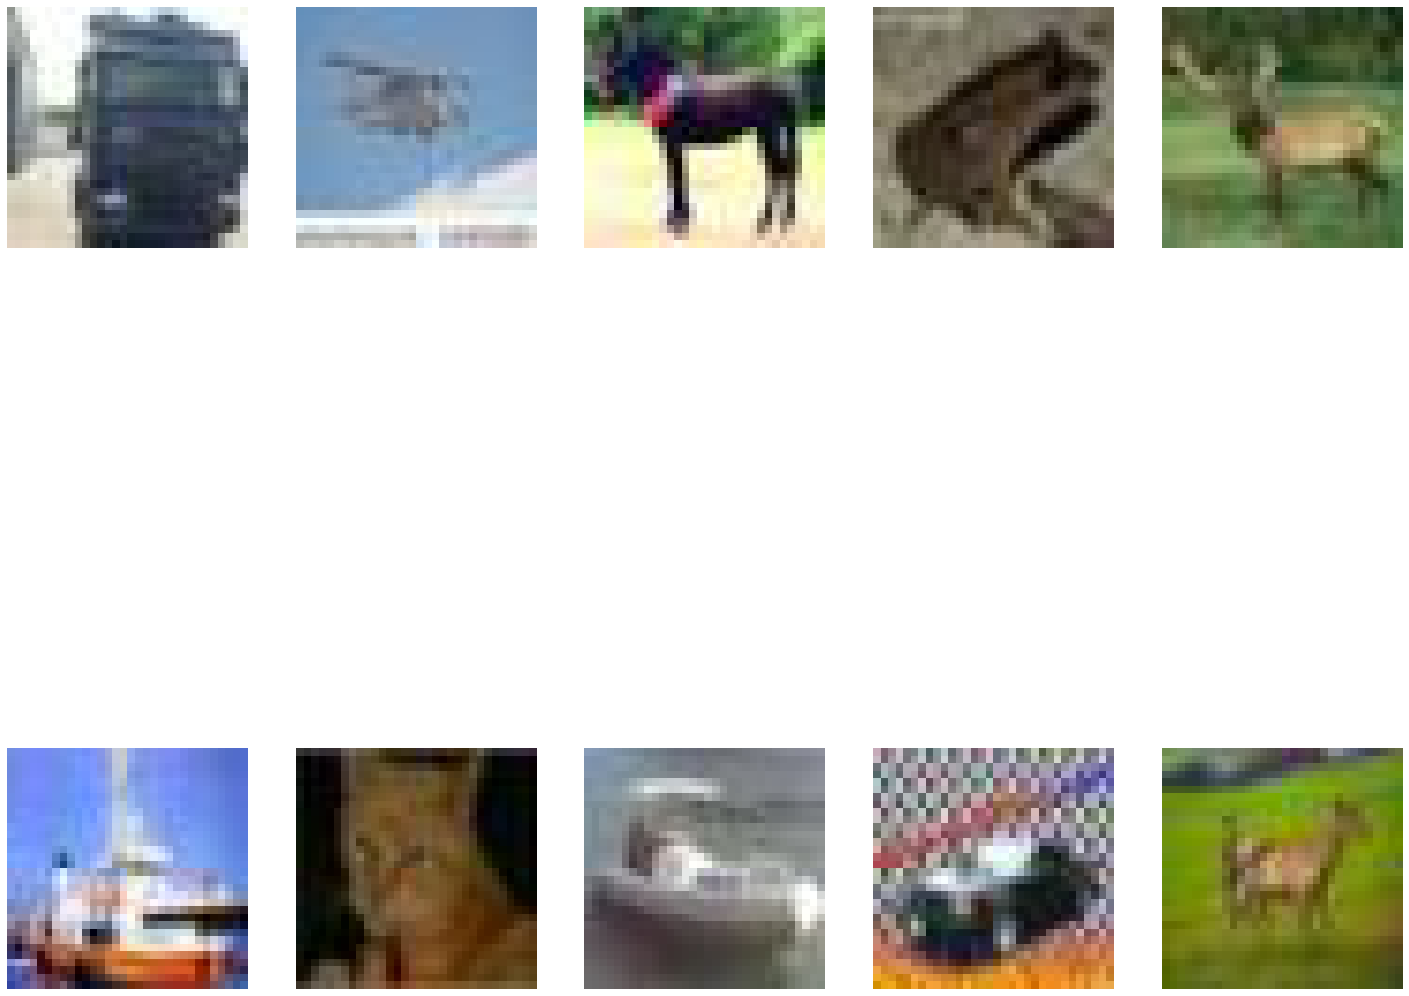

In [10]:
not_a_person_file_path = "./AI_Dataset/data/not_a_person"  # to plot not a person images dataset
not_a_person_images = os.listdir("./AI_Dataset/data/not_a_person")

plot_dataset_images(not_a_person_file_path, not_a_person_images)

Categorical representation of the datasets

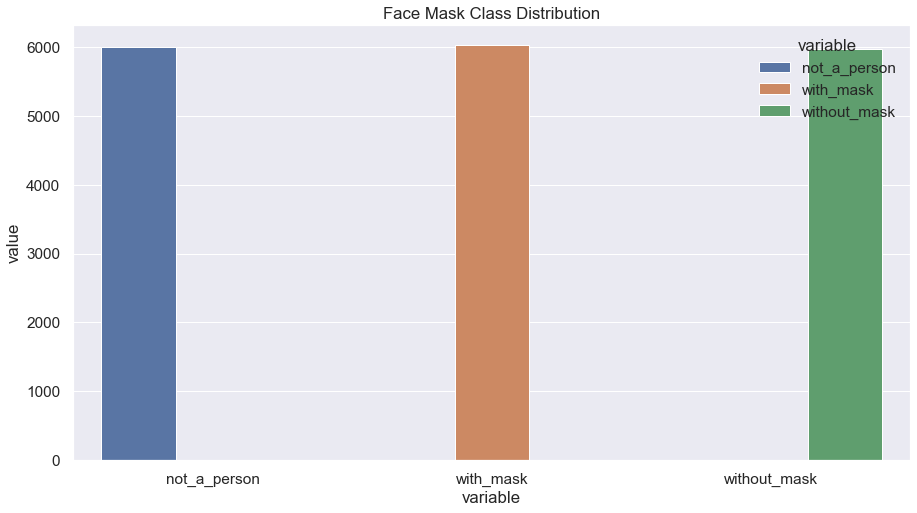

In [95]:
plt.figure(figsize=(15,8))  # plots the distribution of each class images
sns.barplot(data = pd.DataFrame.from_dict([data_class_distribution(dataset)]).melt(), x = "variable", y="value", hue="variable").set_title('Face Mask Class Distribution')
plt.show()

In [11]:
def plot_dataset_images_after_transform(images_list):  # method to visualise our dataset, for the passed parameter class
    
    fig=plt.figure(figsize=(20, 20))
    columns = 8
    rows = 1
    for i in range(1, columns+1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_list[i-1].permute(1,2,0))
    plt.show()
        


Splitting the Data into train, validation and test sets
1. Train size - 60% of the total dataset images
2. Test size - 20% of the total dataset images
3. Validation size - 20% of the total dataset images

In [12]:
train_size = int(0.6 * len(dataset))   
test_size = round((len(dataset) - train_size) * 0.5)   # random split of the datasets
train_dataset, val_dataset, test_dataset = random_split(dataset, (train_size, test_size, test_size))

# Loading Data with the help of DataLoader

In [13]:
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=8, num_workers=2)  # loading train dataset
val_loader = DataLoader(dataset=val_dataset, shuffle=True, batch_size=8, num_workers=2) # loading validation dataset
test_loader = DataLoader(dataset=test_dataset, shuffle=True, batch_size = 1801) # loading test dataset
print("Length of the train_loader:", len(train_loader))
print("Length of the val_loader:", len(val_loader))
print("Length of the test_loader:", len(test_loader))

Length of the train_loader: 28
Length of the val_loader: 10
Length of the test_loader: 1


# Print Train Samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


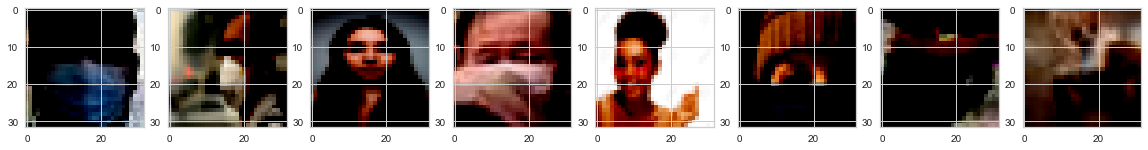

In [14]:
images_train, labels_train = next(iter(train_loader))
plot_dataset_images_after_transform(images_train)


# Print Validation Samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


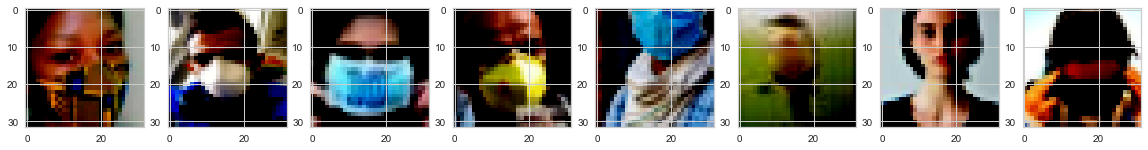

In [15]:
images_val, labels_val = next(iter(val_loader))
plot_dataset_images_after_transform(images_val)

# Print Testing Samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


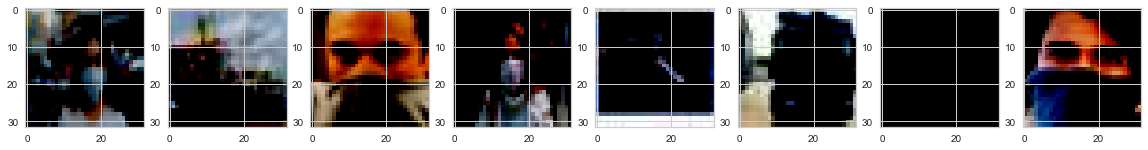

In [16]:
images_test, labels_test = next(iter(test_loader))
plot_dataset_images_after_transform(images_test)

# Convolutional Neural Network Architecture and model training

CNN Model Architecture
- Consist of three major blocks in the CNN Model

In [93]:
class CNN(nn.Module):  # CNN Model class
    def __init__(self):
        super(CNN, self).__init__()    # blocks architecture
        self.conv_layer = nn.Sequential(   
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # block 1
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # block 2
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1), # block 3
            nn.BatchNorm2d(128),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fully_connected_layer = nn.Sequential(  # full connected layer
            nn.Dropout(p=0.1),
            nn.Linear(8 * 8 * 32, 1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(128, 3)
        )

    def forward(self, x):   # forward pass on the CNN Model
        x = self.conv_layer(x) # convolutional layers

        x = x.view(x.size(0), -1)  # flattening the layers

        x = self.fully_connected_layer(x) # fully connected layer

        return x

CNN model, loss function and Optimizer initialization


In [94]:
net = CNN()  # calling Model 
criterion = nn.CrossEntropyLoss()  # loss criteria
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # using Stochastic Gradient Descent as a optimizer
# lrf = LearningRateFinder(net, criterion, optimizer)  # to find the best learning rate on the model
# lrf.fit(train_loader)
# lrf.plot() # plot the best learning rate 


# Training the CNN model

Conversion of output probabilities to predicted class labels

In [95]:
def images_to_probs(net, images):  # to predict the class labels 
    output = net(images)
    _, preds_tensor = torch.max(output, 1)  
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

Evaluation function 


In [96]:
def evaluate_accuracy(net, dataloader):  # method to evaluate the accuracy of the passed dataset
    correct, total = 0, 0
    with torch.no_grad():
        net.eval()
        for images, labels in dataloader:
            images, labels = images, labels.numpy()
            preds, probs = images_to_probs(net, images)

            total += len(labels)   # counting total no. of dataset
            correct += (preds == labels).sum()  # counting correct predictions done by the model
    return correct/total * 100

Train CNN Model for the given Parameters



In [97]:
def train_model(net,  criterion, opt, train_image, test_images,epochs):  # train model based on the given parameter
    num_steps = 0  
    min_loss = 1e+10
    running_loss = []  # to store the loss of each epochs 
    val_running_loss = []  # to store the loss of each epochs 
    epochs_loss = []
    accuracy = []  # to store the accuracy of each epochs
    for epoch in tqdm(range(1, epochs+1), total=epochs, desc='Training'):
        #print(type(train_images))
        num_steps += 1
        net.train() # Setting the network to TRAIN mode
        for images, labels in train_image:
            train_images, train_labels = images, labels
            
            outs = net(train_images)   # Forward Propagation on the Model
            loss =  criterion(outs, train_labels)

            running_loss.append(loss.item()) # Storing loss values

           # Backward Propagation on the Model
            opt.zero_grad()   
            loss.backward()
            opt.step()

        
        epoch_loss = sum(running_loss) / len(running_loss) # calculating loss for each epoch
        epochs_loss.append(epoch_loss)
        acc = evaluate_accuracy(net, test_images) # calculating the accuracy for each epoch
 
        accuracy.append(acc)

        print("Accuracy of the Model in epoch {} : {}".format(num_steps, acc)) 
        print("Loss of the current epoch: ",epoch_loss)
        
        
        
        if epoch_loss < min_loss:  # Finding the minimum loss
            min_loss = epoch_loss
            bestmodel = net.state_dict()
    return running_loss, epochs_loss, accuracy

    print('Training finished on the Train data-sets!!!')

In [98]:
train_val_loader = ConcatDataset([train_dataset, val_dataset])
print(len(train_val_loader))

14404


# K-FOLD

In [99]:
running_loss_epochs = []
epochs_loss = []
accuracy_epochs = []
num_epochs = 10   # define no. of epochs to run
counter = 0
kf = KFold(n_splits=10, shuffle = True)
for i, (train_index, test_index) in enumerate(kf.split(train_val_loader)):
    print("----------------K fold:{}----------:".format(i+1))
    print("TRAIN:", train_index, "TEST:", test_index)

    train = torch.utils.data.Subset(train_val_loader, train_index)
    test = torch.utils.data.Subset(train_val_loader, test_index)

    trainloader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=50, num_workers=2)
    testloader = torch.utils.data.DataLoader(dataset=test,shuffle=True, batch_size=50, num_workers=2)
    
    running_loss,epoch_loss,accuracy = train_model(net, criterion, optimizer, trainloader, testloader,num_epochs)
    running_loss_epochs.append(np.mean(running_loss))
    epochs_loss.append(np.mean(epoch_loss))
    accuracy_epochs.append(np.mean(accuracy))

----------------K fold:1----------:
TRAIN: [    0     1     2 ... 14401 14402 14403] TEST: [    5     7    17 ... 14386 14391 14394]


Accuracy of the Model in epoch 1 : 82.09576682859125
Loss of the current epoch:  0.8180892133942017
Accuracy of the Model in epoch 2 : 90.83969465648855
Loss of the current epoch:  0.5791401170910551
Accuracy of the Model in epoch 3 : 91.46426092990978
Loss of the current epoch:  0.46115694516935407
Accuracy of the Model in epoch 4 : 92.57460097154754
Loss of the current epoch:  0.3863232200445894
Accuracy of the Model in epoch 5 : 94.8646773074254
Loss of the current epoch:  0.33579781077945464
Accuracy of the Model in epoch 6 : 95.48924358084663
Loss of the current epoch:  0.29672289546459724
Accuracy of the Model in epoch 7 : 95.41984732824427
Loss of the current epoch:  0.2660317570774478
Accuracy of the Model in epoch 8 : 94.93407356002776
Loss of the current epoch:  0.2395643461031096
Accuracy of the Model in epoch 9 : 94.58709229701596
Loss of the current epoch:  0.21739604293127965
Accuracy of the Model in epoch 10 : 96.32199861207495
Loss of the current epoch:  0.1984003874103

Accuracy of the Model in epoch 1 : 98.6120749479528
Loss of the current epoch:  0.05133184955428498
Accuracy of the Model in epoch 2 : 99.3060374739764
Loss of the current epoch:  0.04131690960247607
Accuracy of the Model in epoch 3 : 98.68147120055517
Loss of the current epoch:  0.03472644075996075
Accuracy of the Model in epoch 4 : 99.44482997918112
Loss of the current epoch:  0.029398488003565804
Accuracy of the Model in epoch 5 : 99.51422623178348
Loss of the current epoch:  0.02494551301575624
Accuracy of the Model in epoch 6 : 99.58362248438584
Loss of the current epoch:  0.021434611460771965
Accuracy of the Model in epoch 7 : 99.16724496877168
Loss of the current epoch:  0.0192812043045066
Accuracy of the Model in epoch 8 : 98.75086745315753
Loss of the current epoch:  0.01863424566228367
Accuracy of the Model in epoch 9 : 99.37543372657876
Loss of the current epoch:  0.017604402959647977
Accuracy of the Model in epoch 10 : 99.44482997918112
Loss of the current epoch:  0.0161356

Accuracy of the Model in epoch 1 : 98.05690492713394
Loss of the current epoch:  0.011548864865415873
Accuracy of the Model in epoch 2 : 98.88965995836226
Loss of the current epoch:  0.016671268080720506
Accuracy of the Model in epoch 3 : 98.26509368494102
Loss of the current epoch:  0.01597689064749433
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.013154307968132063
Accuracy of the Model in epoch 5 : 99.72241498959056
Loss of the current epoch:  0.011071194483240386
Accuracy of the Model in epoch 6 : 99.86120749479528
Loss of the current epoch:  0.009709418603289612
Accuracy of the Model in epoch 7 : 98.82026370575988
Loss of the current epoch:  0.009318233514992183
Accuracy of the Model in epoch 8 : 99.93060374739764
Loss of the current epoch:  0.008583253917028673
Accuracy of the Model in epoch 9 : 99.93060374739764
Loss of the current epoch:  0.007739201487625268
Accuracy of the Model in epoch 10 : 99.86120749479528
Loss of the current epoch:  0.00702672429

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  0.001994789134106703
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  0.0025036418765659197
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  0.0020786318574921143
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.0017556441547727584
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.0014751520758419737
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.0014179385796879637
Accuracy of the Model in epoch 7 : 99.72241498959056
Loss of the current epoch:  0.003347749477918294
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  0.003645222591690684
Accuracy of the Model in epoch 9 : 99.93060374739764
Loss of the current epoch:  0.0037802432861211792
Accuracy of the Model in epoch 10 : 99.93060374739764
Loss of the current epoch:  0.0035732947340203773

----------------K fold:5----------:
TRAIN: [    0     2

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  0.0015835812570528034
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  0.0015216987559877172
Accuracy of the Model in epoch 3 : 99.23611111111111
Loss of the current epoch:  0.0016651090288737928
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.0017409516117306968
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.0015128435510422815
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.0013345604965689535
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  0.0011895685537705663
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  0.0010801376009840606
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  0.000978155168473467
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  0.0008949851588606459

----------------K fold:6----------:
TRAIN: [    0     1     2 ... 14401 14402

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  0.0001492639909621665
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  0.0001621355871651968
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  0.0001594703047661101
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.00014636917008816069
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.000134590821009729
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.00013517821960059944
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  0.00014024271990957548
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  0.00016287420828422664
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  0.00020755680186500527
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  0.000204722238801196

----------------K fold:7----------:
TRAIN: [    0     1     2 ... 14401 14402 14403] 

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  0.00020488431505590108
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  0.00015305237874284873
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  0.00013220687690544507
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.00012164166952091959
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.00012136604781429784
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.00011609274465065949
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  0.00010775949246172226
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  0.00010348103357168488
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  9.993210355398923e-05
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  9.604459681738192e-05

----------------K fold:8----------:
TRAIN: [    0     1     3 ... 14401 14402 14

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  9.933699214719547e-05
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  7.844018962281588e-05
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  0.00013028677060519957
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.0001292872559191621
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.00013571859441767104
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.00013346268323842354
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  0.00012204399257832442
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  0.00011467149158031786
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  0.00010728563642666918
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  0.00010177894252507258

----------------K fold:9----------:
TRAIN: [    0     1     2 ... 14401 14402 144

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  4.593777034445933e-05
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  5.3927286469191725e-05
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  5.043119607367503e-05
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  4.7553796604988134e-05
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  4.8361674047634135e-05
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  4.872964427442219e-05
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  4.7847591901548904e-05
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  4.5732000215017784e-05
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  4.606185299501754e-05
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  4.571709693843437e-05

----------------K fold:10----------:
TRAIN: [    0     1     2 ... 14401 14402 1440

Accuracy of the Model in epoch 1 : 100.0
Loss of the current epoch:  9.701231607397613e-05
Accuracy of the Model in epoch 2 : 100.0
Loss of the current epoch:  0.00019927310849156426
Accuracy of the Model in epoch 3 : 100.0
Loss of the current epoch:  0.0001614008817579833
Accuracy of the Model in epoch 4 : 100.0
Loss of the current epoch:  0.00014170071397113195
Accuracy of the Model in epoch 5 : 100.0
Loss of the current epoch:  0.00012478994254361343
Accuracy of the Model in epoch 6 : 100.0
Loss of the current epoch:  0.00011214267361463015
Accuracy of the Model in epoch 7 : 100.0
Loss of the current epoch:  0.00010148705309680801
Accuracy of the Model in epoch 8 : 100.0
Loss of the current epoch:  9.546020636415929e-05
Accuracy of the Model in epoch 9 : 100.0
Loss of the current epoch:  8.883125579592047e-05
Accuracy of the Model in epoch 10 : 100.0
Loss of the current epoch:  8.359118781186226e-05



Training Loss Plot

[0.3798622735465432, 0.027480934793708906, 0.011079935785935044, 0.0025572307768217963, 0.0013501591183344985, 0.00016024040624519658, 0.00012564612590948502, 0.00011523125490608517, 4.802999098643891e-05, 0.00012056893395216492]


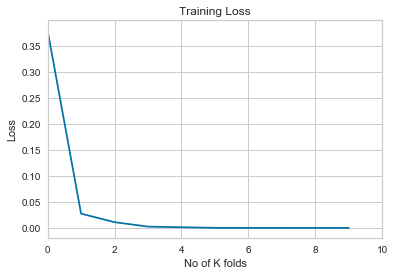

In [100]:
print(epochs_loss)
plt.plot(epochs_loss, label='Training loss') # print loss of each epoch
plt.xlim([0, 10])
plt.title("Training Loss")
plt.xlabel("No of K folds")
plt.ylabel("Loss");

Training Accuracy Plot

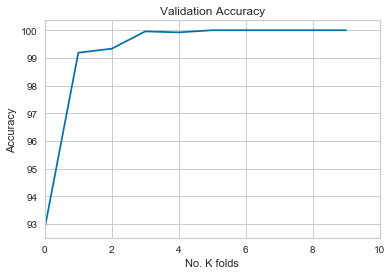

In [101]:
#X = np.linspace(0,10);
plt.plot(accuracy_epochs, label="Validation Accuracy") # print accuracy of each epoch
#plt.xlim([0, 10])
plt.xlim(0, 10)
plt.title("Validation Accuracy")
plt.xlabel("No. K folds")
plt.ylabel("Accuracy");

# Validating Network

Prediction of the Images


In [102]:
def prediction(predlab, testlab):  # method to show comparsion between Actual vs Predicted
  print("Prediction vs Actual class Label")
  predicted_list = []
  actual_list = []
  for i in predlab:
    if i == 2:  
      predicted_list.append("without_mask")
    elif i ==1: 
      predicted_list.append("with_mask")
    else :
      predicted_list.append("not_a_person")
 
  for i in testlab:
    if i == 2:  
      actual_list.append("without_mask")
    elif i ==1:
      actual_list.append("with_mask")
    else :
      actual_list.append("not_a_person")
        
  t = Texttable()
  main_row = [['Predicted', 'Actual']]

  for i in range(0, len(predicted_list)):
    tmp = [predicted_list[i],actual_list[i]]
    main_row.append(tmp)
  t.add_rows(main_row)
  print(t.draw()) # printing the talbe

# Testing Network



Accuracy of the Model on Test set:  99.44459872257706
Prediction vs Actual class Label
+--------------+--------------+
|  Predicted   |    Actual    |
+==============+==============+
| with_mask    | with_mask    |
+--------------+--------------+
| with_mask    | with_mask    |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| with_mask    | with_mask    |
+--------------+--------------+
| with_mask    | with_mask    |
+--------------+--------------+
| not_a_person | not_a_person |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


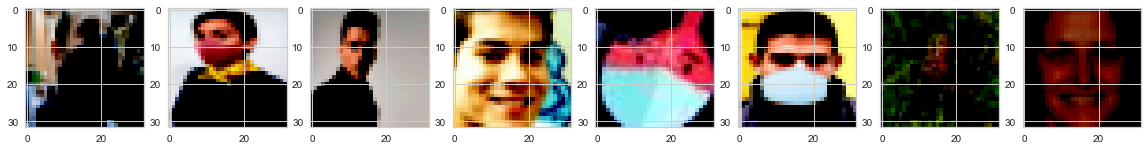

In [103]:
acc = evaluate_accuracy(net, test_loader)  # evaluate the accuracy on the test set
print("Accuracy of the Model on Test set: ",acc)
testimg, testlab = next(iter(test_loader))

pred = net(testimg)
predlab = torch.argmax(pred,axis=1)
prediction(predlab[0:8], testlab[0:8]) # predictions of the first 08 test set

plot_dataset_images_after_transform(testimg[0:8])


# Convolutional Neural Network Model Evaluation
1. Confustion Matrix
2. Precision
3. Recall
4. Accuracy
5. F1-Score

# Confusion Matrix

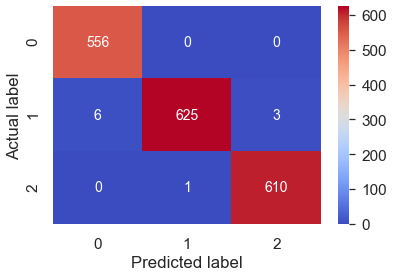

[[556   0   0]
 [  6 625   3]
 [  0   1 610]]


In [112]:
pred = predlab.numpy()   # plot the confusion matrix 
test = testlab.numpy()
matrix = confusion_matrix(test,pred)
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(matrix, annot=True, annot_kws={"size": 14},cmap="coolwarm", fmt="d")  # use of heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()  # plot confusion matrix
print(matrix)


# Classification Report

In [113]:
report = classification_report(test, pred, target_names=['with_mask','without_mask','not_a_person'])
print(report)  

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       556
without_mask       1.00      0.99      0.99       634
not_a_person       1.00      1.00      1.00       611

    accuracy                           0.99      1801
   macro avg       0.99      0.99      0.99      1801
weighted avg       0.99      0.99      0.99      1801

